In [1]:
# define bounding box
lat_bottom, lat_top = 33.9, 34.2
lon_bottom, lon_top = -118.4, -118.0
extent = (lon_bottom, lon_top, lat_bottom, lat_top)

# input data shape
dim = 200
frames_per_sample = 5

# date range of data
start_date, end_date = "2025-01-10-00", "2025-01-17-00"

In [2]:
# python nonsense that allows you to import from sibling directories
import sys
sys.path.append("..")

In [3]:
from libs.hrrrdata import HRRRData
HD = HRRRData(
    start_date=start_date,
    end_date=end_date,
    extent=extent,
    extent_name='la_region2',
    product='MASSDEN',
    frames_per_sample=frames_per_sample,
    sample_setting=1, # uses n-frame-forecast sampling
    dim=dim,
    verbose=True
)

▌▌Herbie HRRR model sfc product initialized 2025-Jan-10 00:00 UTC F00 ┊ source=aws
▌▌Herbie HRRR model sfc product initialized 2025-Jan-10 01:00 UTC F00 ┊ source=aws
▌▌Herbie HRRR model sfc product initialized 2025-Jan-10 02:00 UTC F00 ┊ source=aws
▌▌Herbie HRRR model sfc product initialized 2025-Jan-10 03:00 UTC F00 ┊ source=aws
▌▌Herbie HRRR model sfc product initialized 2025-Jan-10 04:00 UTC F00 ┊ source=aws
▌▌Herbie HRRR model sfc product initialized 2025-Jan-10 05:00 UTC F00 ┊ source=aws
▌▌Herbie HRRR model sfc product initialized 2025-Jan-10 06:00 UTC F00 ┊ source=aws
▌▌Herbie HRRR model sfc product initialized 2025-Jan-10 07:00 UTC F00 ┊ source=aws
▌▌Herbie HRRR model sfc product initialized 2025-Jan-10 08:00 UTC F00 ┊ source=aws
▌▌Herbie HRRR model sfc product initialized 2025-Jan-10 09:00 UTC F00 ┊ source=aws
▌▌Herbie HRRR model sfc product initialized 2025-Jan-10 10:00 UTC F00 ┊ source=aws
▌▌Herbie HRRR model sfc product initialized 2025-Jan-10 11:00 UTC F00 ┊ source=aws
▌▌He

Ignoring index file '/home/mgraca/data/hrrr/20250110/la_region2_subset_d9ef9dd4__hrrr.t00z.wrfsfcf00.grib2.5b7b6.idx' older than GRIB file
Ignoring index file '/home/mgraca/data/hrrr/20250110/la_region2_subset_87ef9dd4__hrrr.t01z.wrfsfcf00.grib2.5b7b6.idx' older than GRIB file
Ignoring index file '/home/mgraca/data/hrrr/20250110/la_region2_subset_03ef9dd4__hrrr.t02z.wrfsfcf00.grib2.5b7b6.idx' older than GRIB file
Ignoring index file '/home/mgraca/data/hrrr/20250110/la_region2_subset_64ef9dd4__hrrr.t03z.wrfsfcf00.grib2.5b7b6.idx' older than GRIB file
Ignoring index file '/home/mgraca/data/hrrr/20250110/la_region2_subset_10ef9dd4__hrrr.t04z.wrfsfcf00.grib2.5b7b6.idx' older than GRIB file
Ignoring index file '/home/mgraca/data/hrrr/20250110/la_region2_subset_47ef9dd4__hrrr.t05z.wrfsfcf00.grib2.5b7b6.idx' older than GRIB file
Ignoring index file '/home/mgraca/data/hrrr/20250110/la_region2_subset_6def9dd4__hrrr.t06z.wrfsfcf00.grib2.5b7b6.idx' older than GRIB file
Ignoring index file '/home/

In [4]:
# split data
def train_test_split(X, train_size=0.75):
    split_idx = int(X.shape[0] * train_size)
    X_train, X_test = X[:split_idx], X[split_idx:]
    
    return X_train, X_test

# scale training data, then scale test data based on training data stats
from sklearn.preprocessing import StandardScaler
def std_scale(X_train, X_test):
    scaler = StandardScaler()
    scaled_train = scaler.fit_transform(X_train.reshape(-1, 1)).reshape(X_train.shape)
    scaled_test = scaler.transform(X_test.reshape(-1, 1)).reshape(X_test.shape)

    return scaled_train, scaled_test

In [5]:
import numpy as np
X_hrrr = HD.data

# split data
X_hrrr_train, X_hrrr_test = train_test_split(X_hrrr, train_size=0.75)

# scale training data, then test data based on training data's stats
#X_hrrr_train, X_hrrr_test = std_scale(X_hrrr_train, X_hrrr_test)

# combine each data source into one tensor, by channel
X_train = X_hrrr_train
X_test = X_hrrr_test
print(X_train.shape, X_test.shape)

(123, 5, 200, 200, 1) (42, 5, 200, 200, 1)


Displaying frames for example 102.


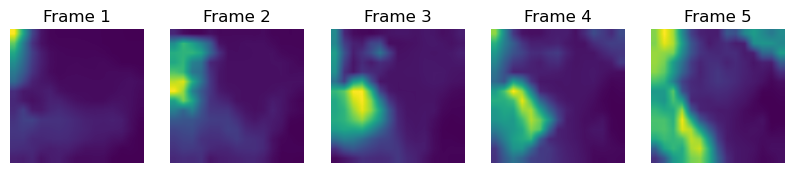

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Construct a figure on which we will visualize the images.
fig, axes = plt.subplots(1, 5, figsize=(10, 4))

# Plot each of the sequential images for one random data example.
# plot hrrr channel
np.random.seed(42)
rand_sample = np.random.choice(range(len(X_train)))
for idx, ax in enumerate(axes):
    ax.imshow(np.squeeze(X_train[rand_sample, idx, :, :, 0]))
    ax.set_title(f"Frame {idx + 1}")
    ax.axis("off")


# Print information and display the figure.
print(f"Displaying frames for example {rand_sample}.")
plt.show()

In [7]:
X_train[rand_sample, 0, :, :, 0]

array([[5.84799986e-10, 5.84799986e-10, 5.84799986e-10, ...,
        1.20000000e-11, 1.20000000e-11, 1.20000000e-11],
       [5.84799986e-10, 5.84799986e-10, 5.84799986e-10, ...,
        1.20000000e-11, 1.20000000e-11, 1.20000000e-11],
       [5.84799986e-10, 5.84799986e-10, 5.84799986e-10, ...,
        1.20000000e-11, 1.20000000e-11, 1.20000000e-11],
       ...,
       [6.07999970e-11, 6.07999970e-11, 6.07999970e-11, ...,
        1.04000003e-11, 1.04000003e-11, 1.04000003e-11],
       [6.07999970e-11, 6.07999970e-11, 6.07999970e-11, ...,
        1.04000003e-11, 1.04000003e-11, 1.04000003e-11],
       [6.07999970e-11, 6.07999970e-11, 6.07999970e-11, ...,
        1.04000003e-11, 1.04000003e-11, 1.04000003e-11]])

In [8]:
X_train[rand_sample, 4, :, :, 0]

array([[1.77600004e-10, 1.77600004e-10, 1.77600004e-10, ...,
        1.10400002e-10, 1.10400002e-10, 1.10400002e-10],
       [1.77600004e-10, 1.77600004e-10, 1.77600004e-10, ...,
        1.10400002e-10, 1.10400002e-10, 1.10400002e-10],
       [1.77600004e-10, 1.77600004e-10, 1.77600004e-10, ...,
        1.10400002e-10, 1.10400002e-10, 1.10400002e-10],
       ...,
       [4.16000012e-11, 4.16000012e-11, 4.16000012e-11, ...,
        2.08000006e-11, 2.08000006e-11, 2.08000006e-11],
       [4.16000012e-11, 4.16000012e-11, 4.16000012e-11, ...,
        2.08000006e-11, 2.08000006e-11, 2.08000006e-11],
       [4.16000012e-11, 4.16000012e-11, 4.16000012e-11, ...,
        2.08000006e-11, 2.08000006e-11, 2.08000006e-11]])